In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

%matplotlib inline

In [2]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv'

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'], s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'], s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_wTemp.csv')
df

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'], s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_akima.csv')
df

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'], s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_akima_90.csv')
df

In [ ]:
df['phi'].unique()[1]

In [ ]:
df_ = df[df['phi']==1.5708]

plt.figure(figsize=(10, 6))
plt.scatter(df_['y'],df_['z'], s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
# plt.title("Ideal Conditions")
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

In [ ]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS_190.csv')
# dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        df_ = df_.drop_duplicates(subset='x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('N-S')
plt.grid()
plt.show()

In [ ]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_akima_90.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

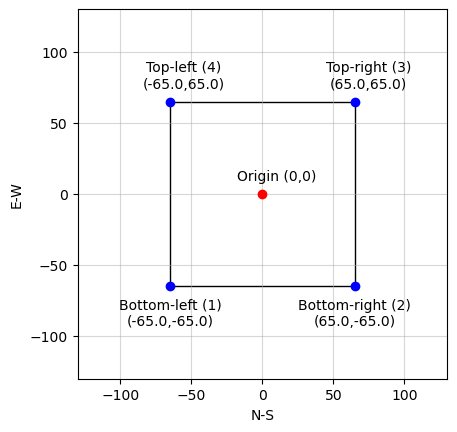

In [4]:
import matplotlib.pyplot as plt

# Length of the square's side
side_length = 130

# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate half the side length
half_length = side_length / 2

# Coordinates of the square's corners
corners = [
    (-half_length, -half_length), # Bottom-left
    (-half_length, half_length),  # Top-left
    (half_length, half_length),   # Top-right
    (half_length, -half_length)   # Bottom-right
]

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the square
square = plt.Polygon(corners, closed=True, fill=None, edgecolor='black')
ax.add_patch(square)

# Plot the origin
ax.plot(0, 0, 'ro')  # Red dot at the origin

# Annotate the origin
ax.annotate('Origin (0,0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center')

# Annotate the corners
corner_labels = ['Bottom-left (1)', 'Top-left (4)', 'Top-right (3)', 'Bottom-right (2)']
corner_offsets = [(0, -28), (10, 10), (10, 10), (0, -28)]
for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
    ax.plot(x, y, 'bo')  # Blue dots at corners
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Set the limits of the plot
ax.set_xlim(-side_length, side_length)
ax.set_ylim(-side_length, side_length)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Comment out grid lines
ax.grid(alpha=0.5)

# Show the plot
plt.xlabel('N-S')
plt.ylabel('E-W')
# plt.title('Acoustic')
plt.show()

In [6]:
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df

x_val     y_val       z_val      x_land     y_land  time_step  \
0          -340.939  -5.55582     22.4729 -113.522206  -2.189402          1   
1          -340.715  -5.46610     25.5526  -88.802349  -2.092762          1   
2          -340.463  -5.37681     28.6299  -63.179213  -2.097703          1   
3          -340.183  -5.28795     31.7046  -37.663917  -2.224865          1   
4          -339.876  -5.19953     34.7764  -13.568053  -2.484695          1   
...             ...       ...         ...         ...        ...        ...   
11639402  11055.200  23.84810  26706.1000  -94.804954  23.956132         96   
11639403  -9686.020  33.21680  27384.1000 -117.557055  33.043913         96   
11639404  -9894.550  32.59690  27310.2000 -116.905762  32.699399         96   
11639405 -10730.900  29.33090  26996.9000 -117.593699  29.501155         96   
11639406 -10931.500  28.03660  26916.8000 -127.806358  28.032657         96   

              phi     theta  
0         0.00000 -1.502690  
1         0.00000 -1.493680  
2         0.00000 -1.484680  
3         0.00000 -1.475670  
4         0.00000 -1.466660  
...           ...       ...  
11639402  3.14159 -0.394818  
11639403  3.14159  0.336398  
11639404  3.14159  0.344814  
11639405  3.14159  0.375858  
11639406  3.14159  0.383050  

[11639407 rows x 8 columns]

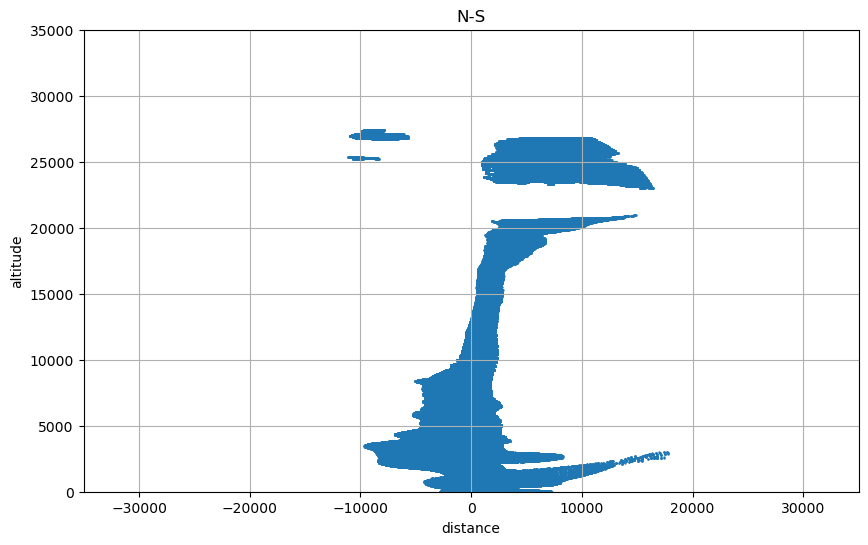

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

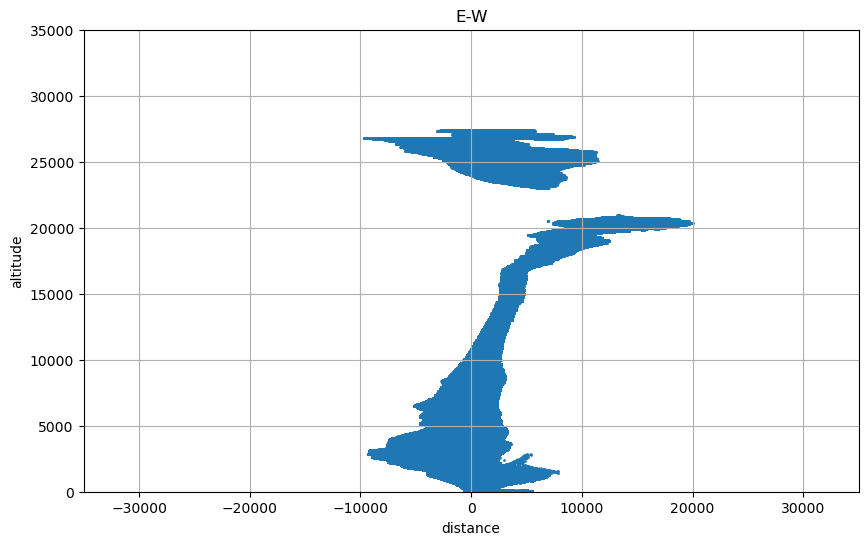

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [4]:

df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_1/backscatter_coordinates_1_G250-r2.csv')
df

x_val     y_val        z_val      x_land     y_land  time_step  \
0         -343.104  -1.16349      8.95995   91.802441  -7.385414          1   
1         -343.601  -1.71877     12.07540  -20.380313  -6.018732          1   
2         -344.063  -2.26988     15.20370 -120.002321  -6.775106          1   
3         -343.542 -14.08820     92.68900  -66.052468 -25.861157          1   
4         -343.011 -14.51720     95.95080   48.456778 -29.453395          1   
...            ...       ...          ...         ...        ...        ...   
8945490  11955.600 -28.13020  26275.50000 -104.530384 -27.529067         96   
8945491  11759.000 -24.11320  26364.80000 -100.545973 -22.941600         96   
8945492  11564.100 -20.00970  26451.50000 -106.605983 -18.108816         96   
8945493  11357.500 -15.89740  26541.90000 -123.598049 -14.962288         96   
8945494   6853.850   6.09338  28083.10000 -118.190946 -75.686532         96   

             phi     theta  
0        0.00000 -1.733180  
1        0.00000 -1.721420  
2        0.00000 -1.709620  
3        0.00000 -1.414900  
4        0.00000 -1.402310  
...          ...       ...  
8945490  3.14159 -0.430327  
8945491  3.14159 -0.422216  
8945492  3.14159 -0.415256  
8945493  3.14159 -0.408982  
8945494  3.14159 -0.249994  

[8945495 rows x 8 columns]

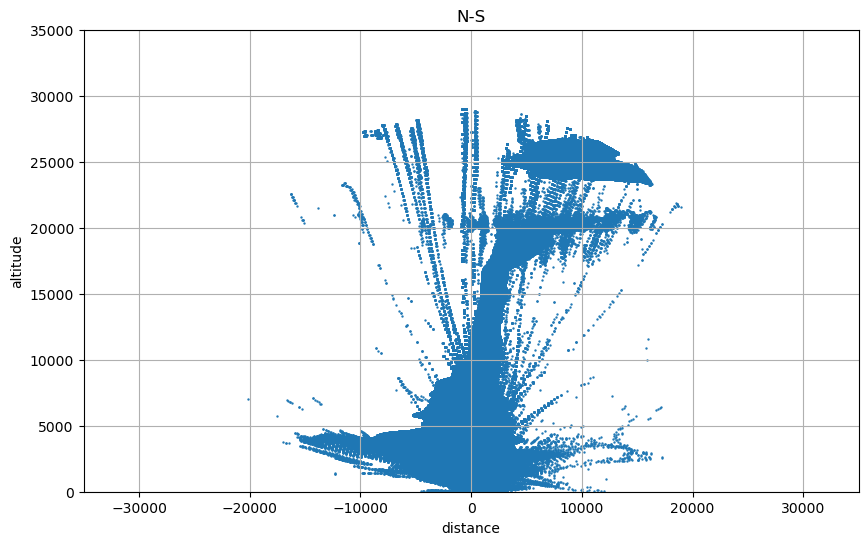

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

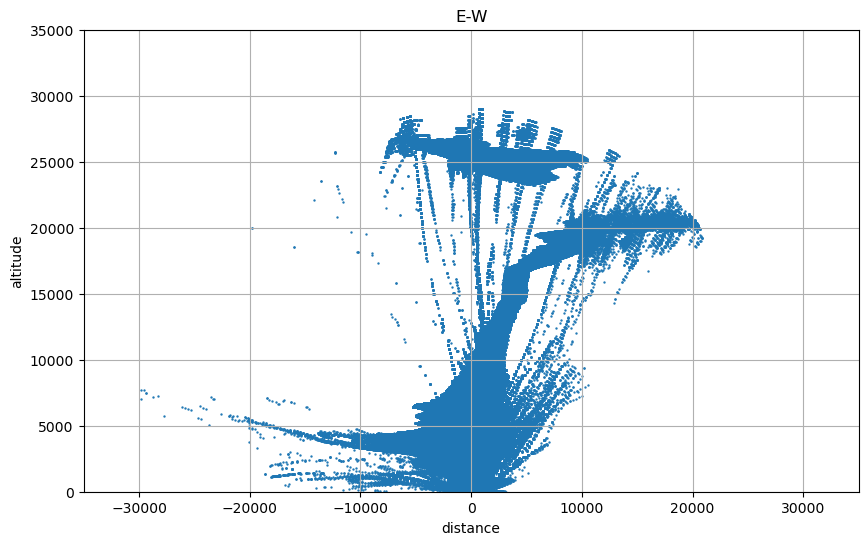

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_2/backscatter_coordinates_2_G250-r2.csv')
df

x_val     y_val       z_val      x_land     y_land  time_step  \
0         -213.601  -1.71877     12.0754   80.698138  -6.262611          1   
1         -214.063  -2.26988     15.2037  -18.427953  -6.266828          1   
2         -214.488  -2.81674     18.3444 -100.970400  -8.302695          1   
3         -214.030 -13.65400     89.4248  -63.233250 -23.442748          1   
4         -213.542 -14.08820     92.6890   29.622550 -25.292644          1   
...            ...       ...         ...         ...        ...        ...   
8435055 -10272.300  -3.38811  27129.8000  -58.107494  -3.758135         96   
8435056 -10547.600  -4.71656  27024.6000  -36.338589  -4.834496         96   
8435057 -10800.900  -6.16218  26924.3000  -41.043439  -6.324954         96   
8435058 -11020.800  -8.29789  26835.4000  -80.567829  -8.287830         96   
8435059 -11264.100 -11.55040  26735.5000 -125.493528 -11.356815         96   

             phi     theta  
0        0.00000 -1.721420  
1        0.00000 -1.709620  
2        0.00000 -1.697760  
3        0.00000 -1.427480  
4        0.00000 -1.414900  
...          ...       ...  
8435055  3.14159  0.358690  
8435056  3.14159  0.371603  
8435057  3.14159  0.381652  
8435058  3.14159  0.385875  
8435059  3.14159  0.394022  

[8435060 rows x 8 columns]

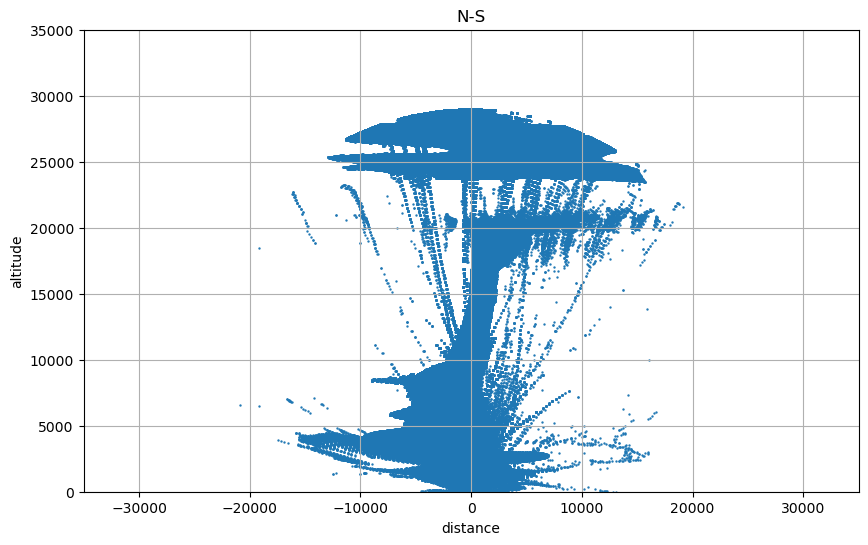

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

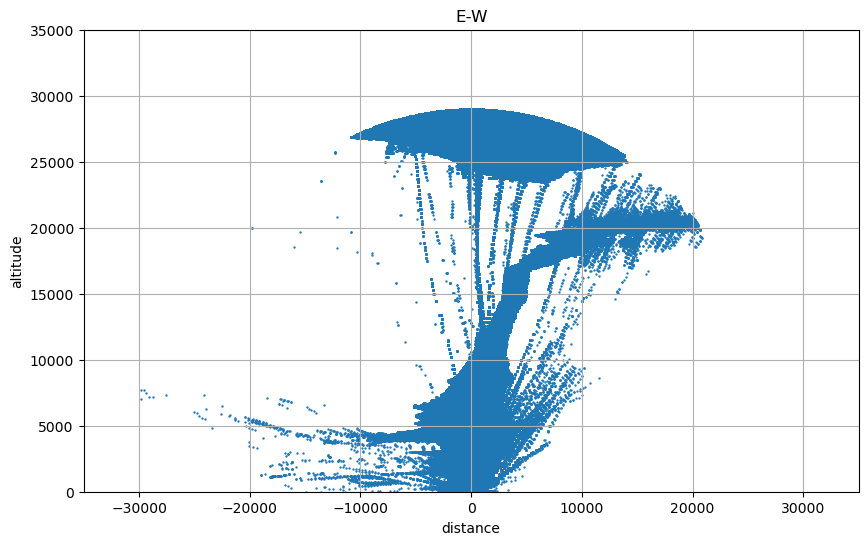

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_3/backscatter_coordinates_3_G250-r2.csv')
df

x_val    y_val       z_val      x_land      y_land  time_step  \
0         -213.601  128.281     12.0754   87.352064  126.333900          1   
1         -214.063  127.730     15.2037   -9.469271  123.778153          1   
2         -214.488  127.183     18.3444  -90.442257  118.994495          1   
3         -214.477  116.786     86.1589 -120.018921  104.132057          1   
4         -214.030  116.346     89.4248  -51.702835  103.073121          1   
...            ...      ...         ...         ...         ...        ...   
7057095 -10272.300  126.612  27129.8000  -58.107489  126.241871         96   
7057096 -10547.600  125.283  27024.6000  -36.338585  125.165512         96   
7057097 -10800.900  123.838  26924.3000  -41.043428  123.675044         96   
7057098 -11020.800  121.702  26835.4000  -80.567823  121.712171         96   
7057099 -11264.100  118.450  26735.5000 -125.493527  118.643184         96   

             phi     theta  
0        0.00000 -1.721420  
1        0.00000 -1.709620  
2        0.00000 -1.697760  
3        0.00000 -1.440040  
4        0.00000 -1.427480  
...          ...       ...  
7057095  3.14159  0.358690  
7057096  3.14159  0.371603  
7057097  3.14159  0.381652  
7057098  3.14159  0.385875  
7057099  3.14159  0.394022  

[7057100 rows x 8 columns]

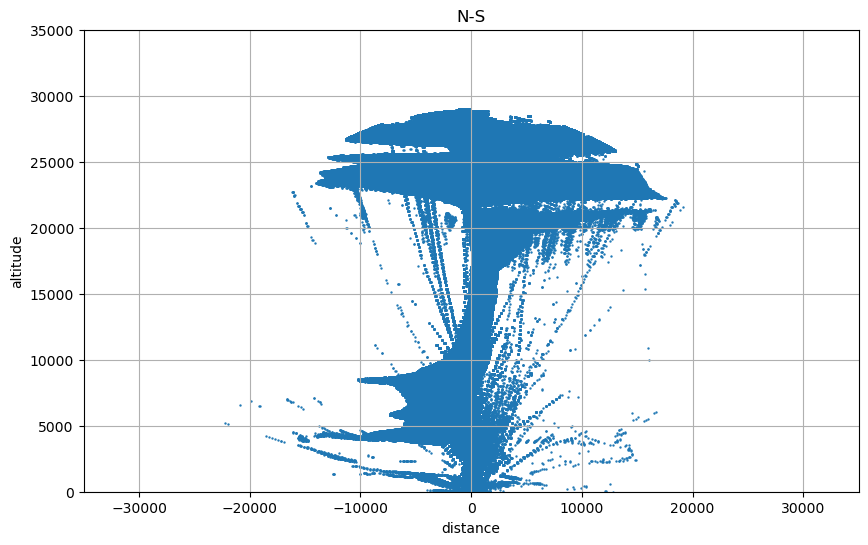

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

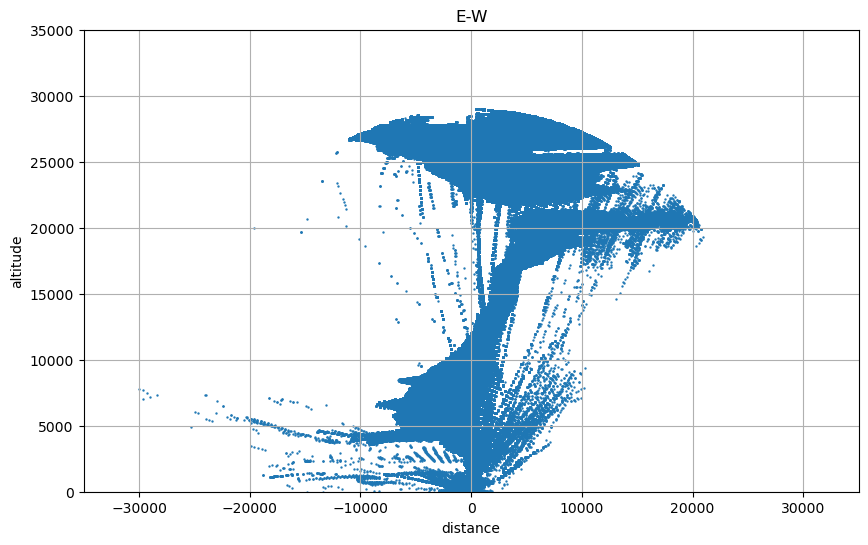

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_4/backscatter_coordinates_4_G250-r2.csv')
df

x_val    y_val        z_val      x_land      y_land  time_step  \
0         -343.104  128.837      8.95995   91.586026  126.521706          1   
1         -343.601  128.281     12.07540  -16.101867  126.792287          1   
2         -344.063  127.730     15.20370 -112.288820  123.352419          1   
3         -343.542  115.912     92.68900  -56.068604   97.417580          1   
4         -343.011  115.483     95.95080   57.480290   92.610464          1   
...            ...      ...          ...         ...         ...        ...   
5987155  11955.600  101.870  26275.50000 -104.530400  102.470921         96   
5987156  11759.000  105.887  26364.80000 -100.545992  107.058385         96   
5987157  11564.100  109.990  26451.50000 -106.605988  111.891162         96   
5987158  11357.500  114.103  26541.90000 -123.598056  115.037700         96   
5987159   6853.850  136.093  28083.10000 -118.191389   54.313511         96   

             phi     theta  
0        0.00000 -1.733180  
1        0.00000 -1.721420  
2        0.00000 -1.709620  
3        0.00000 -1.414900  
4        0.00000 -1.402310  
...          ...       ...  
5987155  3.14159 -0.430327  
5987156  3.14159 -0.422216  
5987157  3.14159 -0.415256  
5987158  3.14159 -0.408982  
5987159  3.14159 -0.249994  

[5987160 rows x 8 columns]

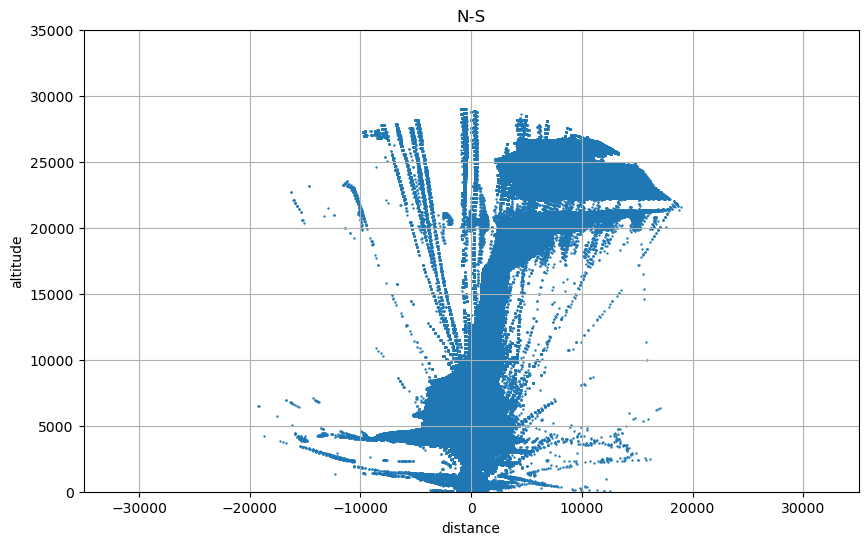

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

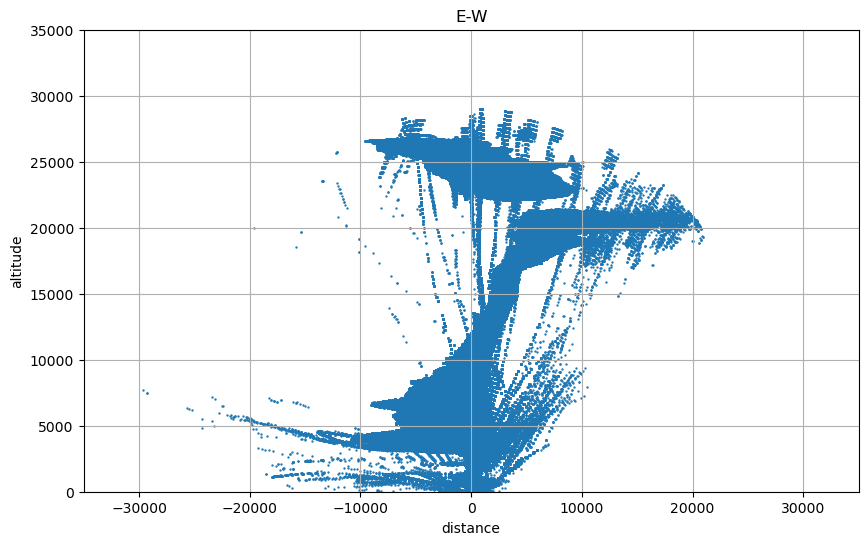

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_1 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_1/backscatter_coordinates_1_G250-r2.csv')
df =  pd.concat([df_0,df_1])

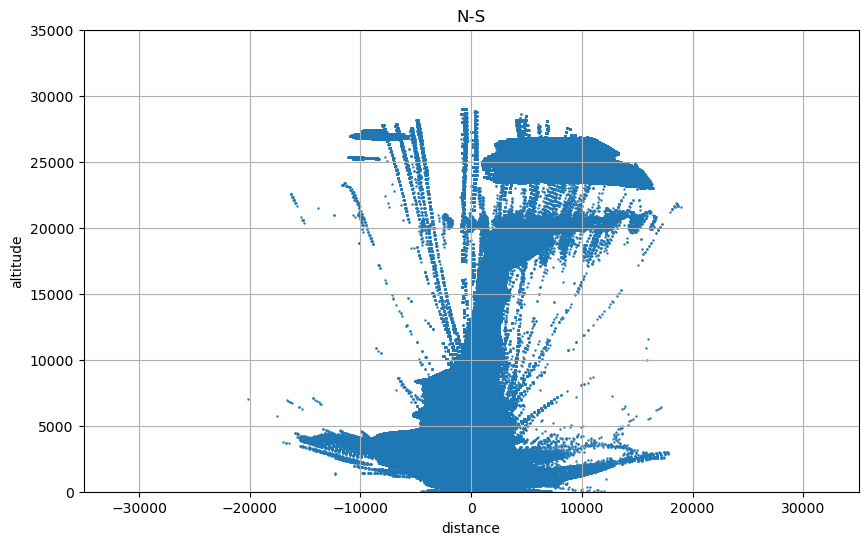

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

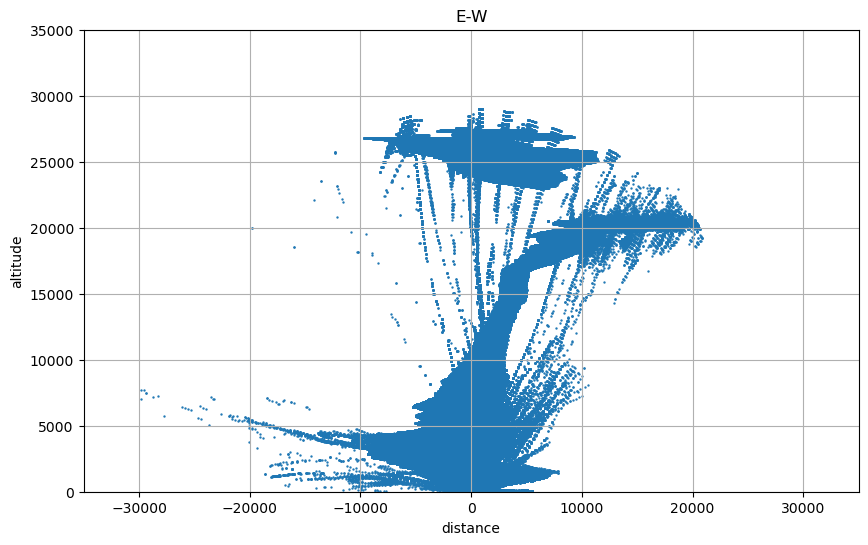

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_2 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_2/backscatter_coordinates_2_G250-r2.csv')
df =  pd.concat([df_0,df_2])

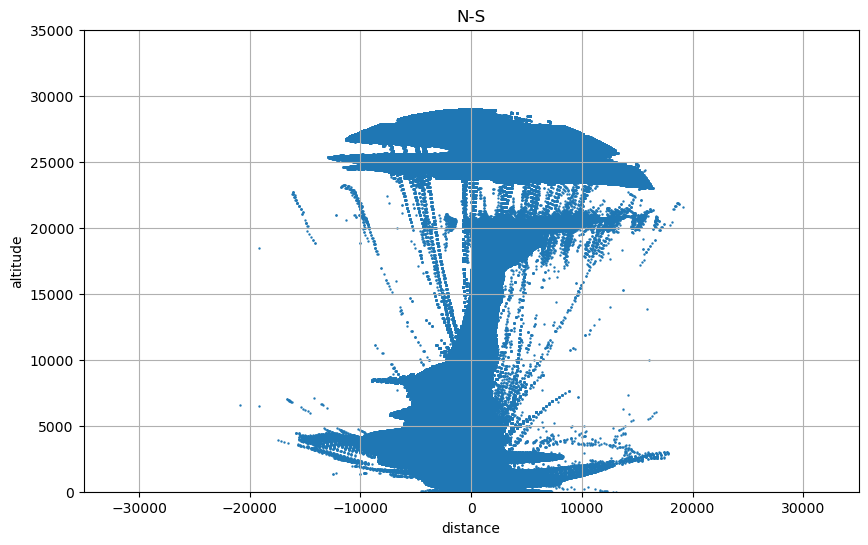

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

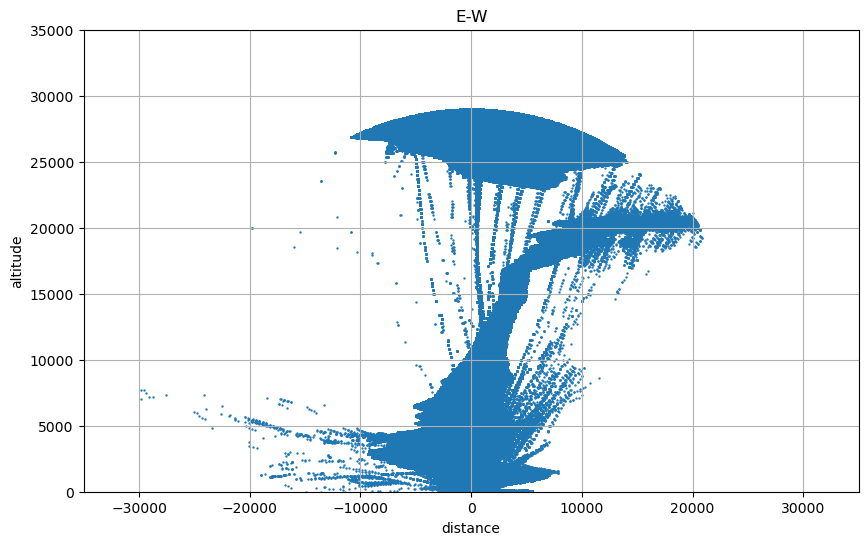

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_3 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_3/backscatter_coordinates_3_G250-r2.csv')
df =  pd.concat([df_0,df_3])

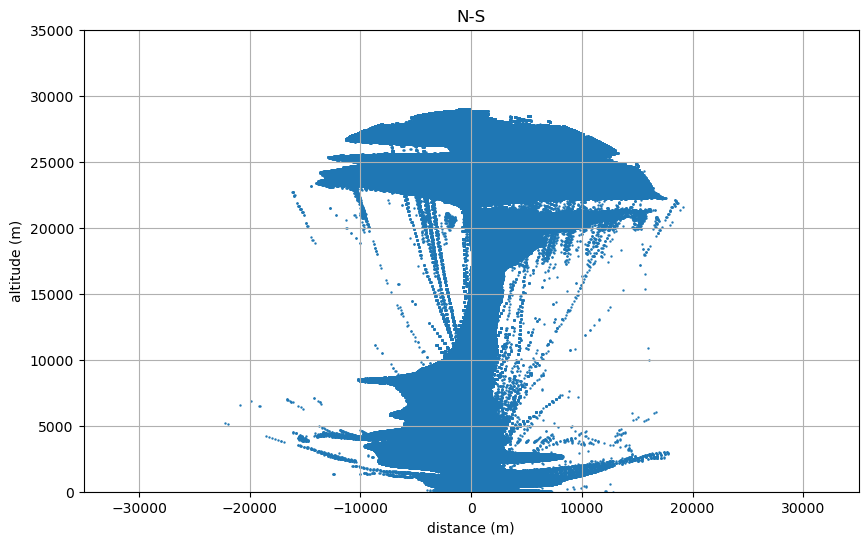

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

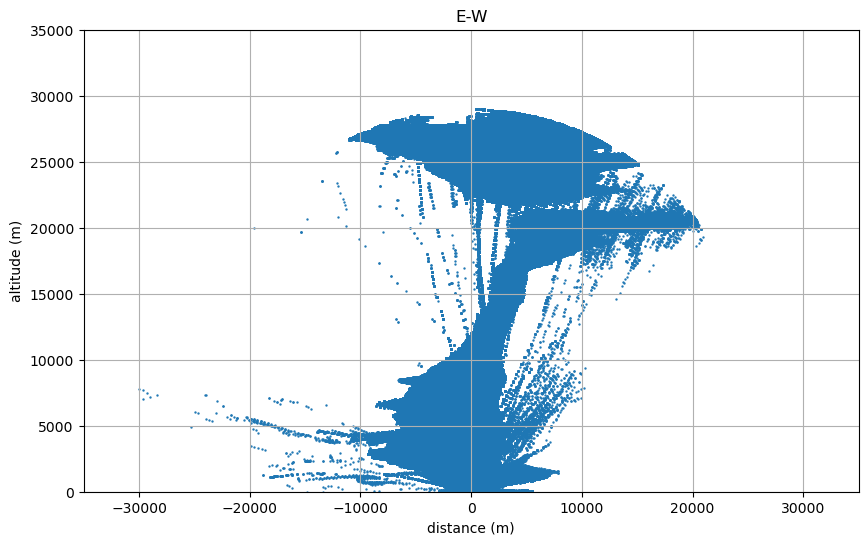

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_4 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_4/backscatter_coordinates_4_G250-r2.csv')
df =  pd.concat([df_0,df_4])

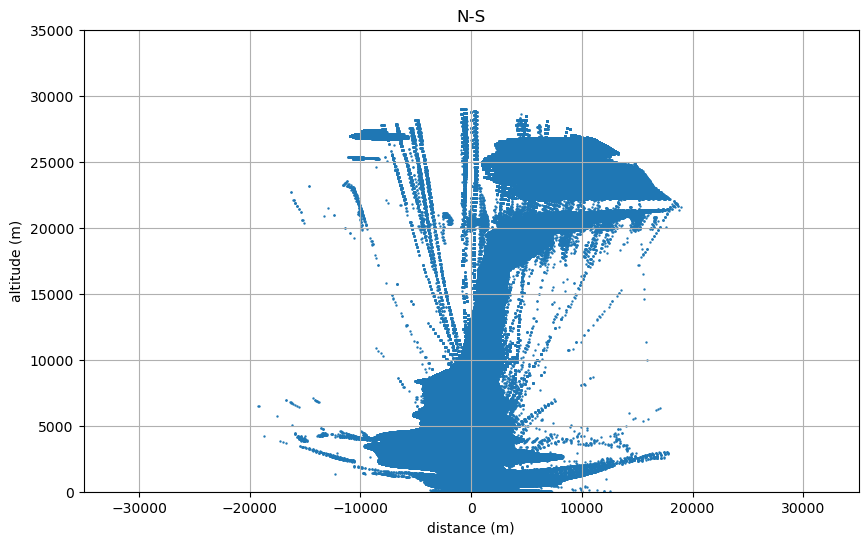

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

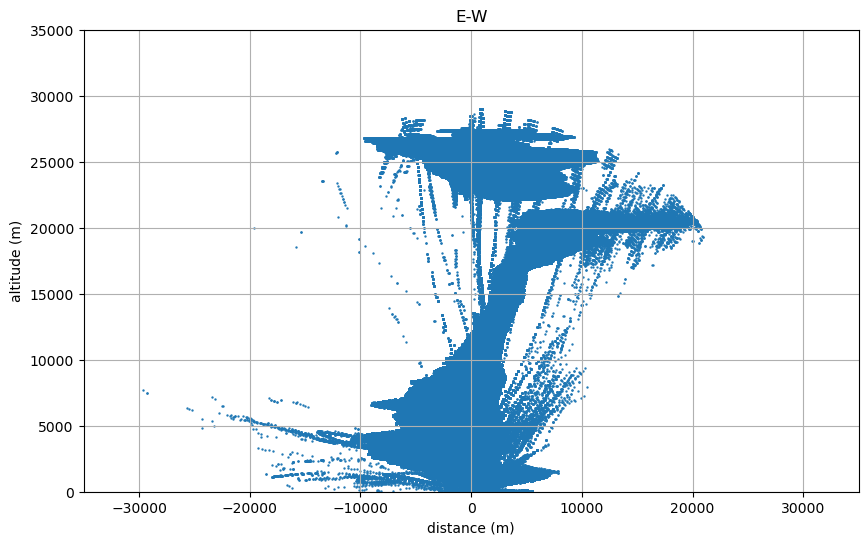

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_3 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_3/backscatter_coordinates_3_G250-r2.csv')
df_1 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_1/backscatter_coordinates_1_G250-r2.csv')
df =  pd.concat([df_0,df_3,df_1])

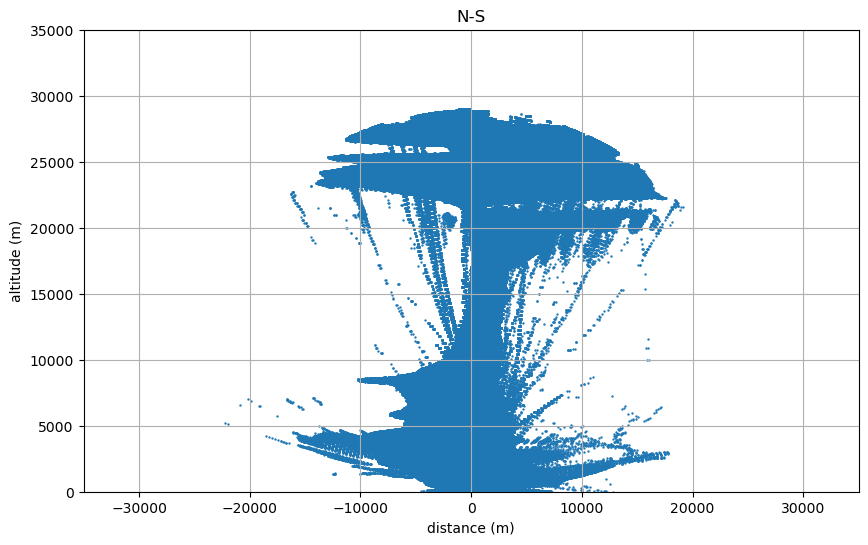

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

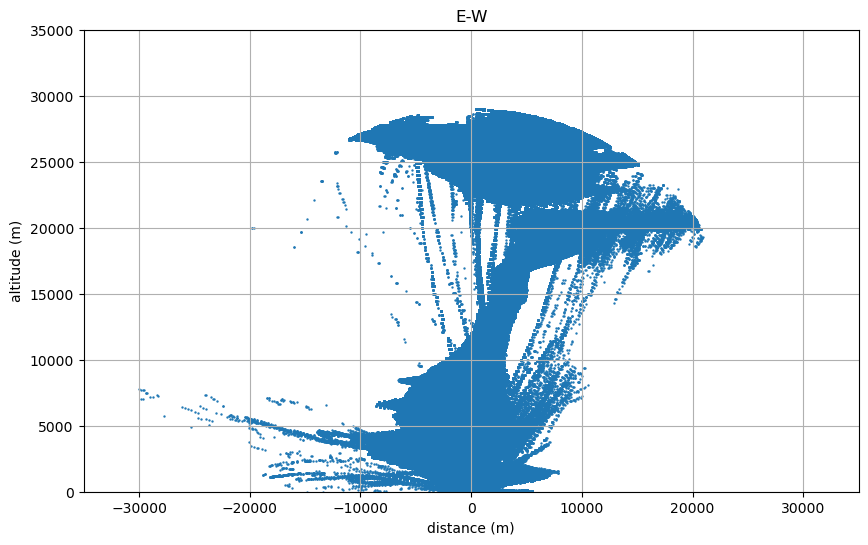

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_4 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_4/backscatter_coordinates_4_G250-r2.csv')
df_2 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_2/backscatter_coordinates_2_G250-r2.csv')
df =  pd.concat([df_0,df_2,df_4])

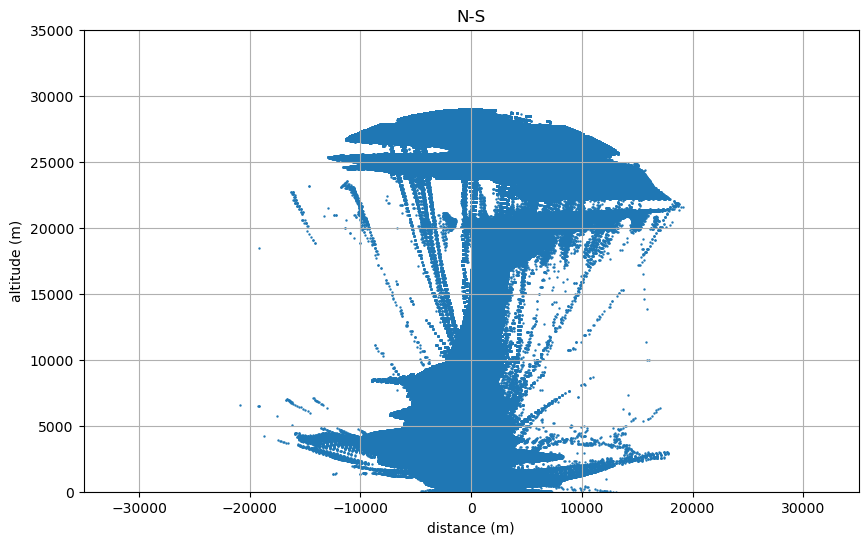

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

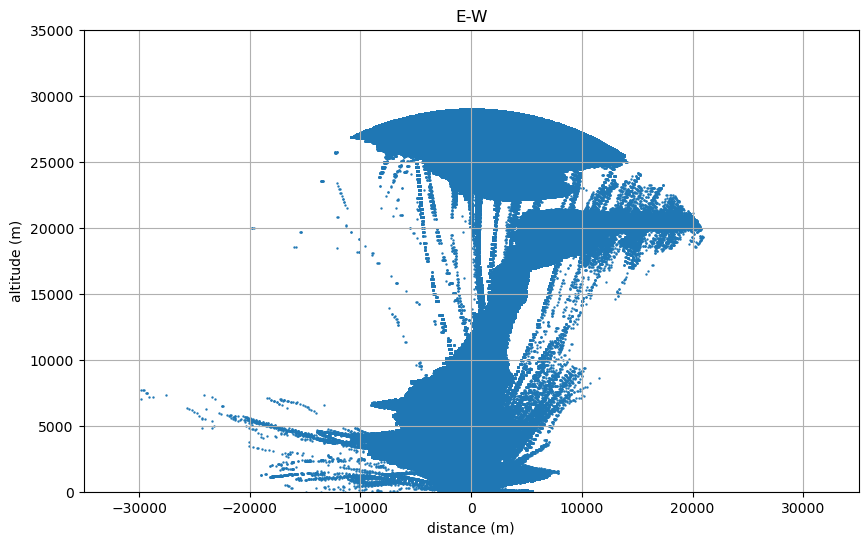

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_5/backscatter_coordinates_5_G250-r2.csv')
df

x_val     y_val       z_val      x_land     y_land  time_step  \
0         -278.601  -1.71877     12.0754   44.619687  -6.018732          1   
1         -279.063  -2.26988     15.2037  -55.002321  -6.775106          1   
2         -279.030 -13.65400     89.4248  -92.637814 -24.097982          1   
3         -278.542 -14.08820     92.6890   -1.052468 -25.861157          1   
4         -278.011 -14.51720     95.9508  113.456778 -29.453395          1   
...            ...       ...         ...         ...        ...        ...   
8851453  -9850.800  -2.22391  27307.9000  -99.100302  -2.216961         96   
8851454 -10085.900  -2.67792  27222.8000 -117.962786  -3.002885         96   
8851455 -10337.300  -3.38811  27129.8000 -123.111101  -3.761260         96   
8851456 -10612.600  -4.71656  27024.6000 -101.340468  -4.834759         96   
8851457 -10865.900  -6.16218  26924.3000 -106.043737  -6.325021         96   

             phi     theta  
0        0.00000 -1.721420  
1        0.00000 -1.709620  
2        0.00000 -1.427480  
3        0.00000 -1.414900  
4        0.00000 -1.402310  
...          ...       ...  
8851453  3.14159  0.343969  
8851454  3.14159  0.350654  
8851455  3.14159  0.358690  
8851456  3.14159  0.371603  
8851457  3.14159  0.381652  

[8851458 rows x 8 columns]

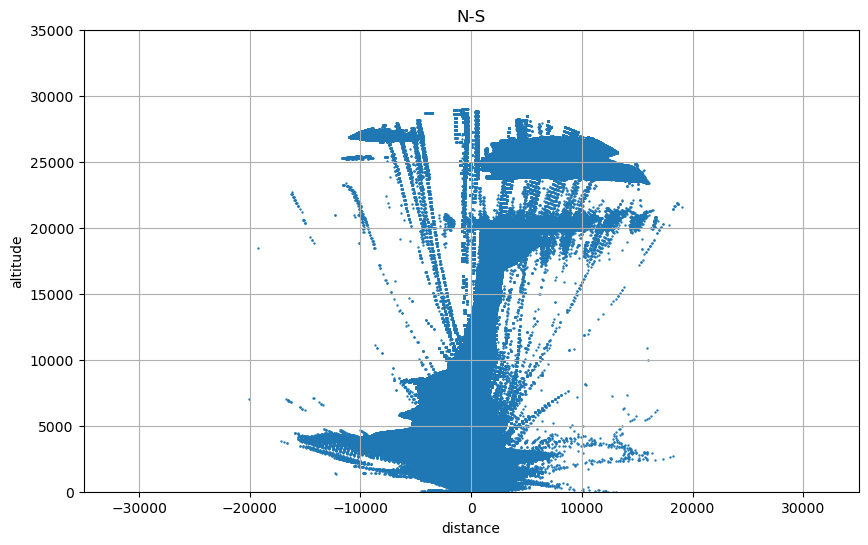

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

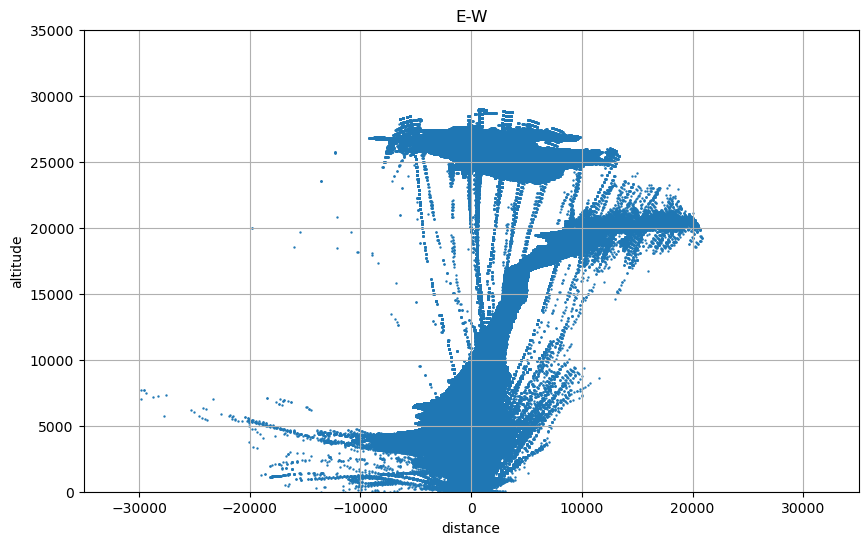

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_6/backscatter_coordinates_6_G250-r2.csv')
df

x_val    y_val       z_val      x_land     y_land  time_step  \
0         -213.601  63.2812     12.0754   83.213707  61.335721          1   
1         -214.063  62.7301     15.2037  -16.292265  58.017190          1   
2         -214.488  62.1833     18.3444  -98.520903  54.574771          1   
3         -214.477  51.7856     86.1589 -126.355917  38.961717          1   
4         -214.030  51.3460     89.4248  -57.375026  37.443893          1   
...            ...      ...         ...         ...        ...        ...   
8680585 -10272.300  61.6119  27129.8000  -58.107495  61.241856         96   
8680586 -10547.600  60.2834  27024.6000  -36.338577  60.165496         96   
8680587 -10800.900  58.8378  26924.3000  -41.043421  58.675040         96   
8680588 -11020.800  56.7021  26835.4000  -80.567815  56.712167         96   
8680589 -11264.100  53.4496  26735.5000 -125.493520  53.643182         96   

             phi     theta  
0        0.00000 -1.721420  
1        0.00000 -1.709620  
2        0.00000 -1.697760  
3        0.00000 -1.440040  
4        0.00000 -1.427480  
...          ...       ...  
8680585  3.14159  0.358690  
8680586  3.14159  0.371603  
8680587  3.14159  0.381652  
8680588  3.14159  0.385875  
8680589  3.14159  0.394022  

[8680590 rows x 8 columns]

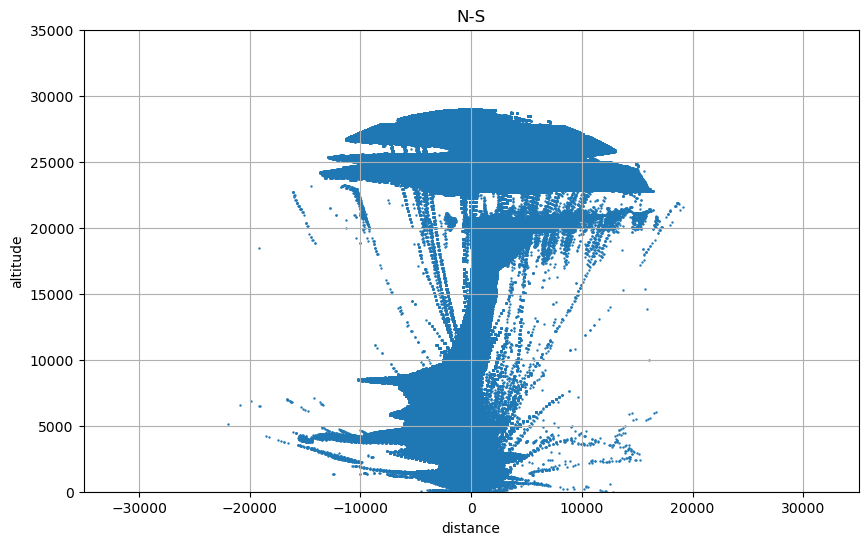

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

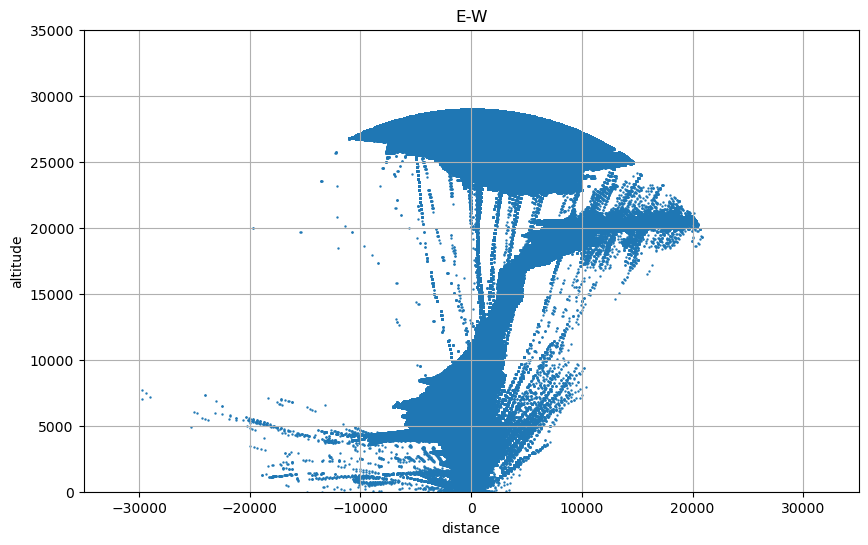

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_7/backscatter_coordinates_7_G250-r2.csv')
df

x_val    y_val       z_val      x_land      y_land  time_step  \
0         -278.601  128.281     12.0754   48.898133  126.792287          1   
1         -279.063  127.730     15.2037  -47.288820  123.352419          1   
2         -279.488  127.183     18.3444 -128.040786  118.471994          1   
3         -279.030  116.346     89.4248  -82.598319  101.815663          1   
4         -278.542  115.912     92.6890    8.931396   97.417580          1   
...            ...      ...         ...         ...         ...        ...   
6414353  -9850.800  127.776  27307.9000  -99.100296  127.783050         96   
6414354 -10085.900  127.322  27222.8000 -117.962778  126.997124         96   
6414355 -10337.300  126.612  27129.8000 -123.111096  126.238746         96   
6414356 -10612.600  125.283  27024.6000 -101.340464  125.165248         96   
6414357 -10865.900  123.838  26924.3000 -106.043726  123.674976         96   

             phi     theta  
0        0.00000 -1.721420  
1        0.00000 -1.709620  
2        0.00000 -1.697760  
3        0.00000 -1.427480  
4        0.00000 -1.414900  
...          ...       ...  
6414353  3.14159  0.343969  
6414354  3.14159  0.350654  
6414355  3.14159  0.358690  
6414356  3.14159  0.371603  
6414357  3.14159  0.381652  

[6414358 rows x 8 columns]

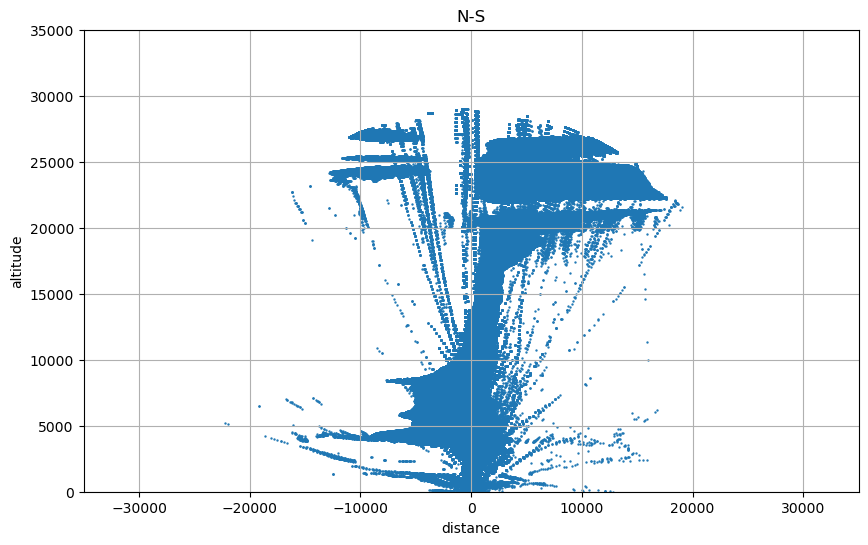

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

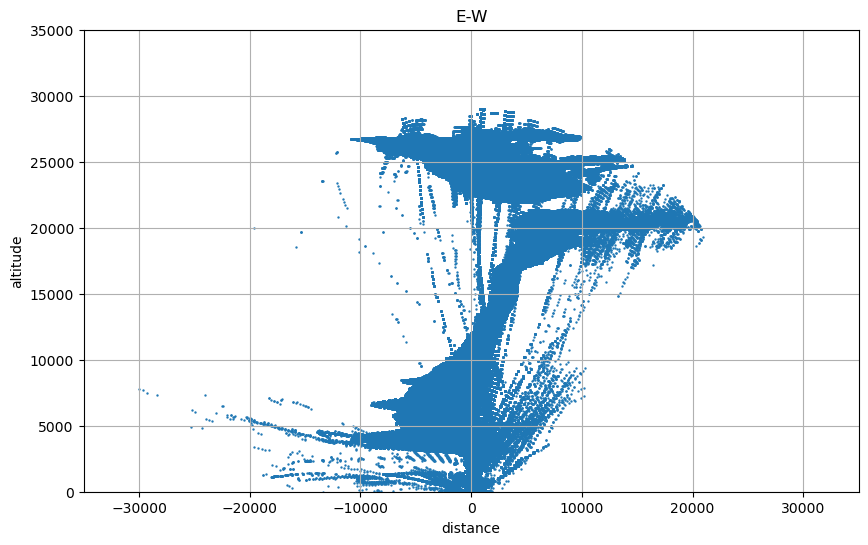

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_8/backscatter_coordinates_8_G250-r2.csv')
df

x_val    y_val        z_val      x_land     y_land  time_step  \
0         -343.104  63.8365      8.95995   92.813954  61.857391          1   
1         -343.601  63.2812     12.07540  -18.857587  61.747881          1   
2         -344.063  62.7301     15.20370 -118.267670  57.703988          1   
3         -343.542  50.9118     92.68900  -61.414866  36.613444          1   
4         -343.011  50.4828     95.95080   50.953328  37.257332          1   
...            ...      ...          ...         ...        ...        ...   
8524034  11955.600  36.8698  26275.50000 -104.530387  37.470926         96   
8524035  11759.000  40.8868  26364.80000 -100.545977  42.058392         96   
8524036  11564.100  44.9903  26451.50000 -106.605987  46.891174         96   
8524037  11357.500  49.1026  26541.90000 -123.598049  50.037704         96   
8524038   6853.850  71.0934  28083.10000 -118.190892 -10.686514         96   

             phi     theta  
0        0.00000 -1.733180  
1        0.00000 -1.721420  
2        0.00000 -1.709620  
3        0.00000 -1.414900  
4        0.00000 -1.402310  
...          ...       ...  
8524034  3.14159 -0.430327  
8524035  3.14159 -0.422216  
8524036  3.14159 -0.415256  
8524037  3.14159 -0.408982  
8524038  3.14159 -0.249994  

[8524039 rows x 8 columns]

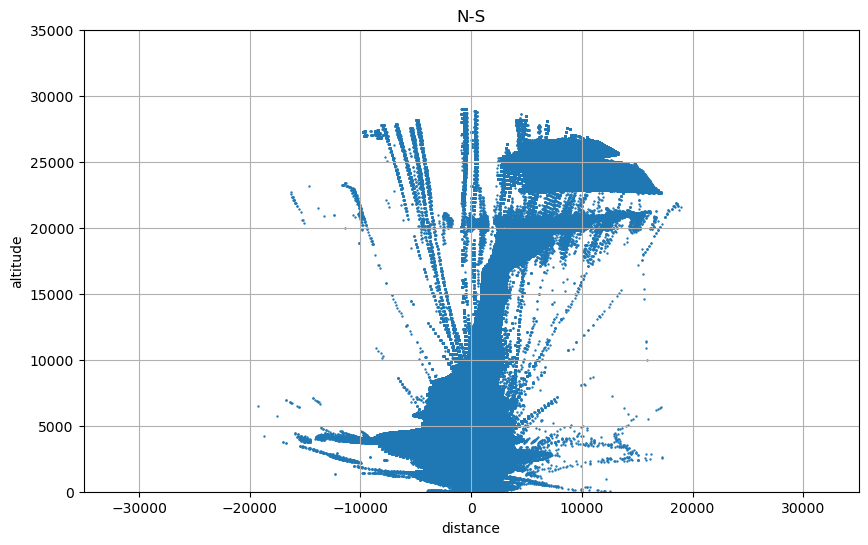

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

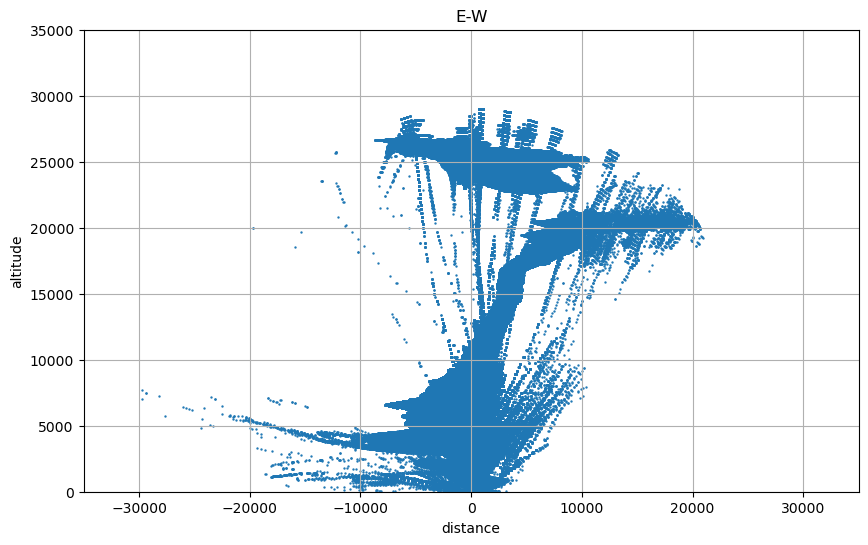

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_5 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_5/backscatter_coordinates_5_G250-r2.csv')
df =  pd.concat([df_0,df_5])

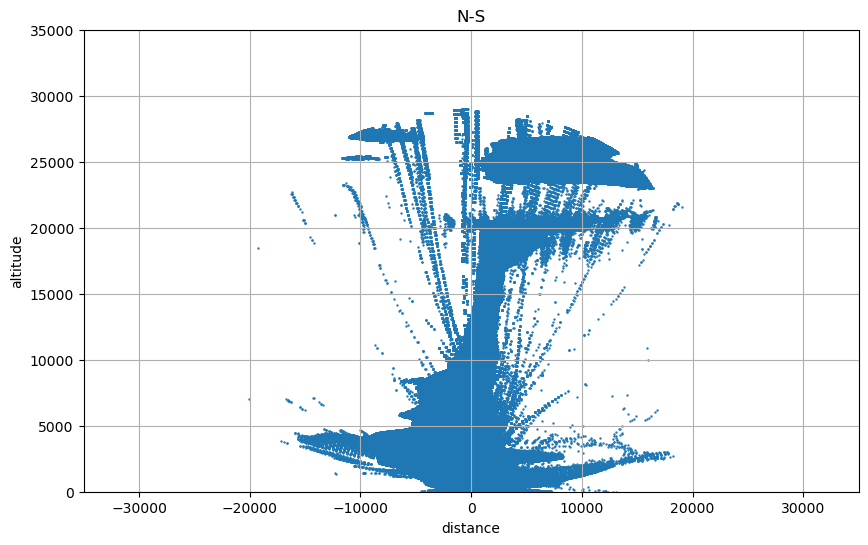

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

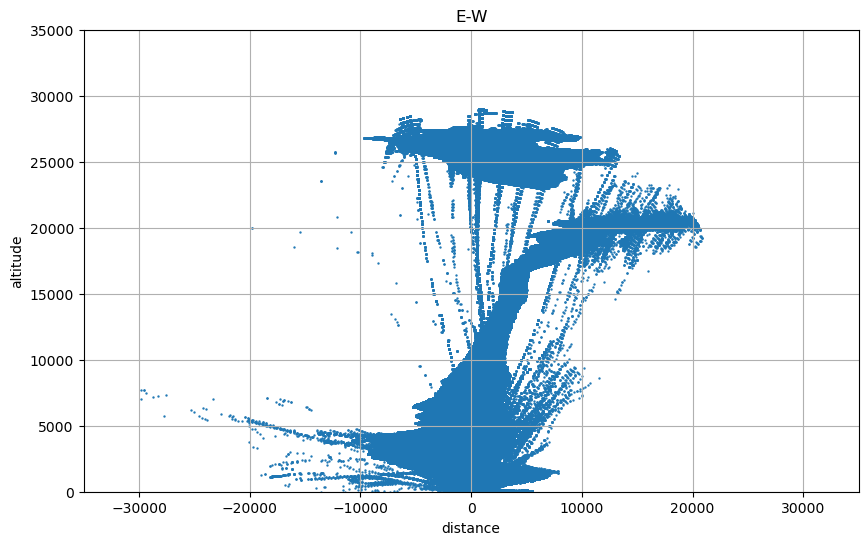

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_6 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_6/backscatter_coordinates_6_G250-r2.csv')
df =  pd.concat([df_0,df_6])

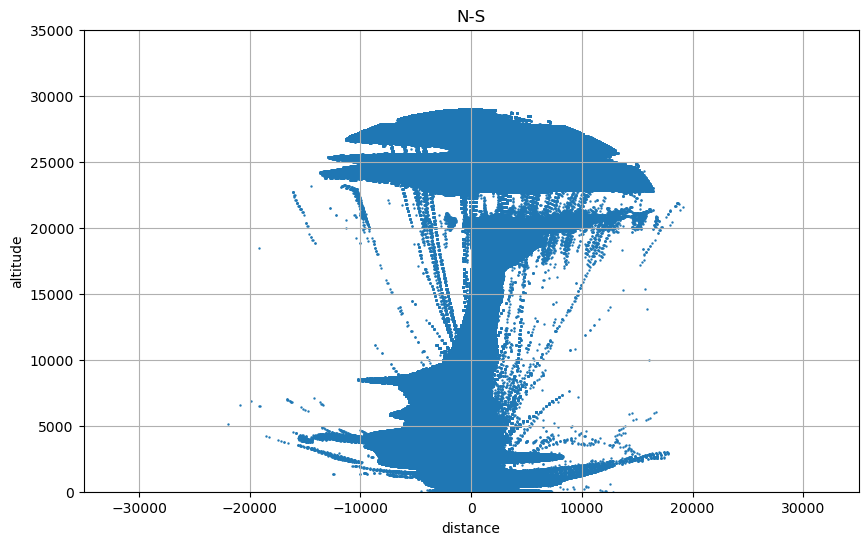

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

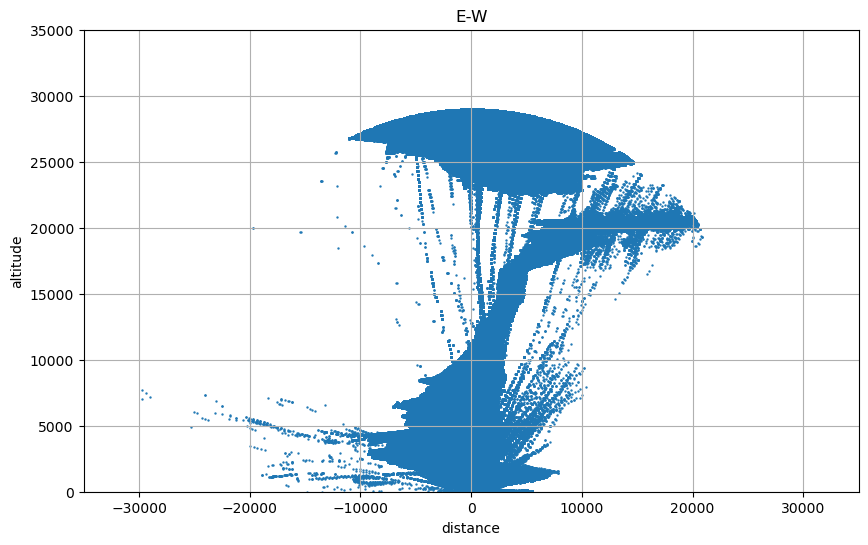

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_7 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_7/backscatter_coordinates_7_G250-r2.csv')
df =  pd.concat([df_0,df_7])

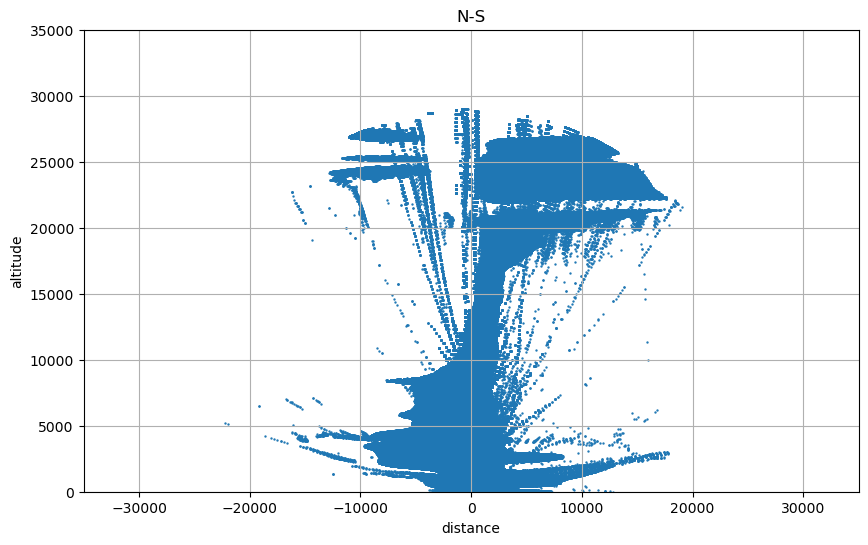

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

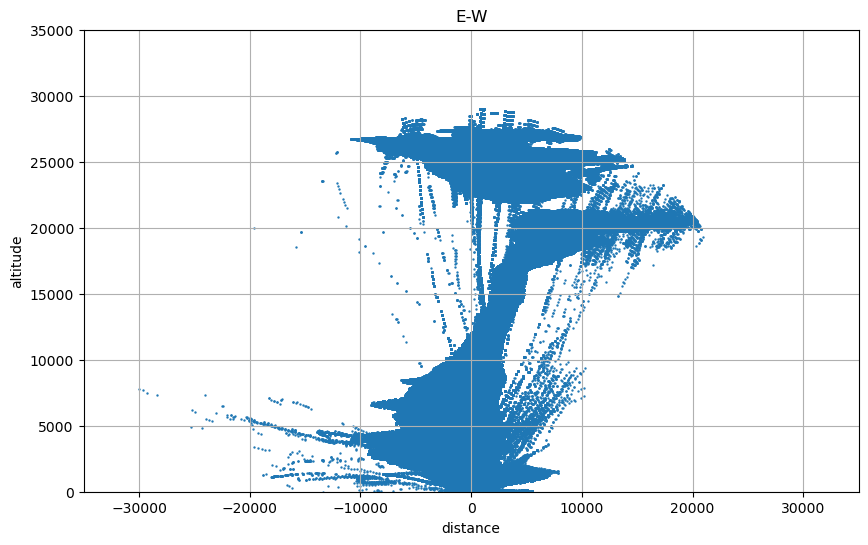

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_8 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_8/backscatter_coordinates_8_G250-r2.csv')
df =  pd.concat([df_0,df_8])

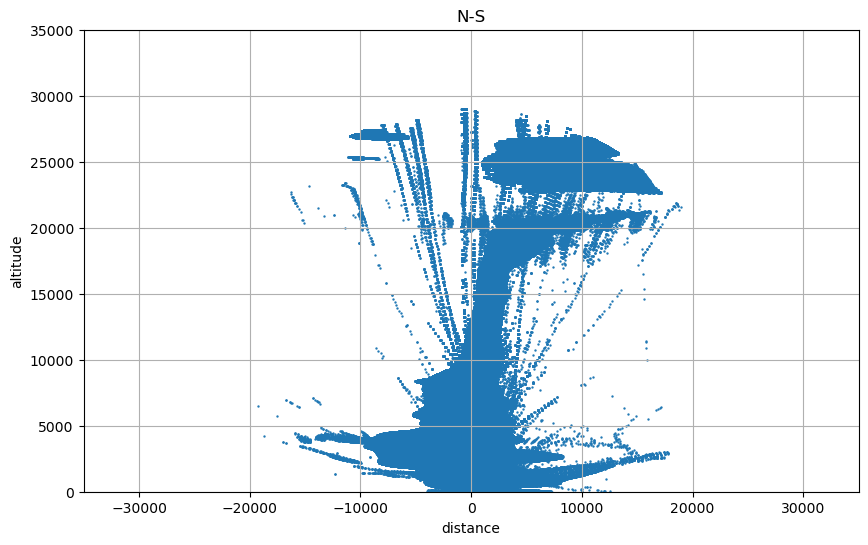

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

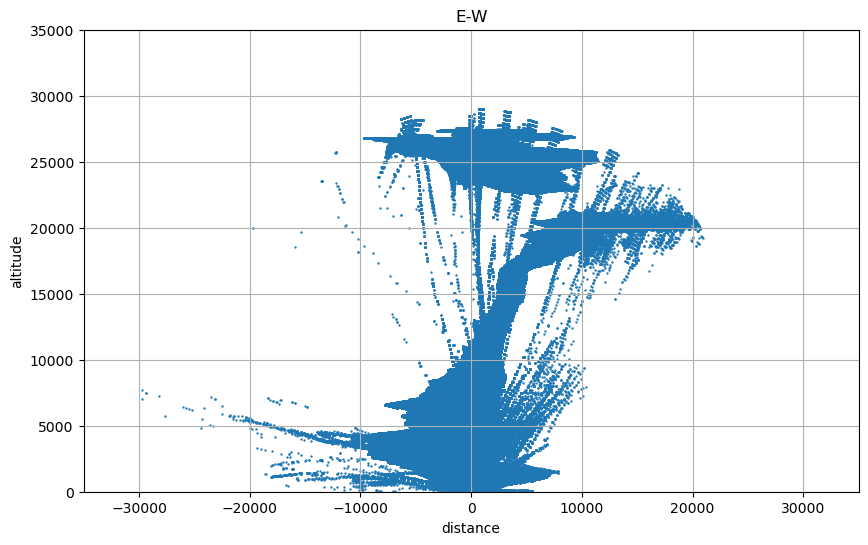

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_1 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_1/backscatter_coordinates_1_G250-r2.csv')
df_2 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_2/backscatter_coordinates_2_G250-r2.csv')
df_3 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_3/backscatter_coordinates_3_G250-r2.csv')
df_4 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_4/backscatter_coordinates_4_G250-r2.csv')
df =  pd.concat([df_0,df_1,df_2,df_3,df_4])

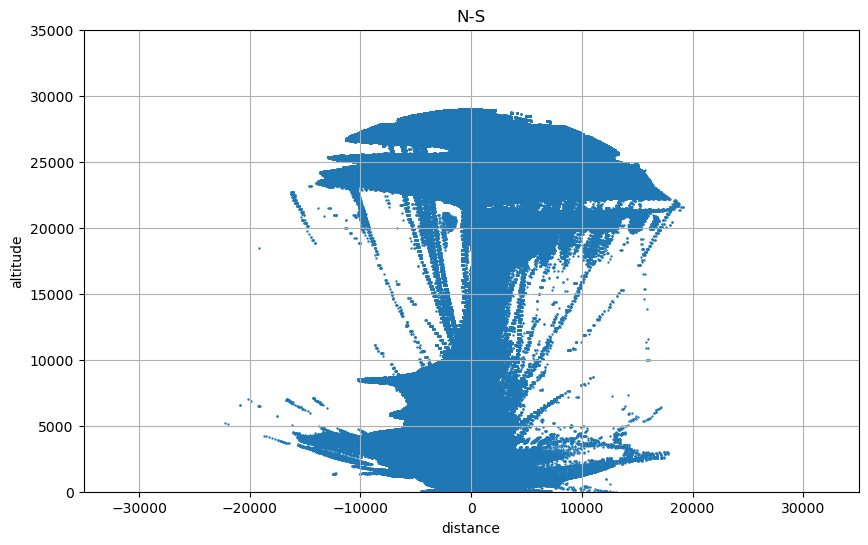

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

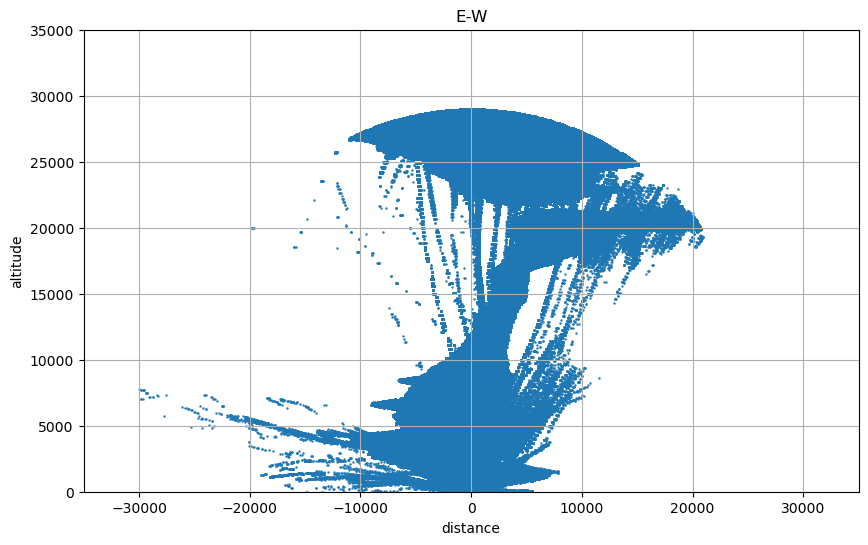

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_5 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_5/backscatter_coordinates_5_G250-r2.csv')
df_6 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_6/backscatter_coordinates_6_G250-r2.csv')
df_7 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_7/backscatter_coordinates_7_G250-r2.csv')
df_8 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_8/backscatter_coordinates_8_G250-r2.csv')
df =  pd.concat([df_0,df_5,df_6,df_7,df_8])

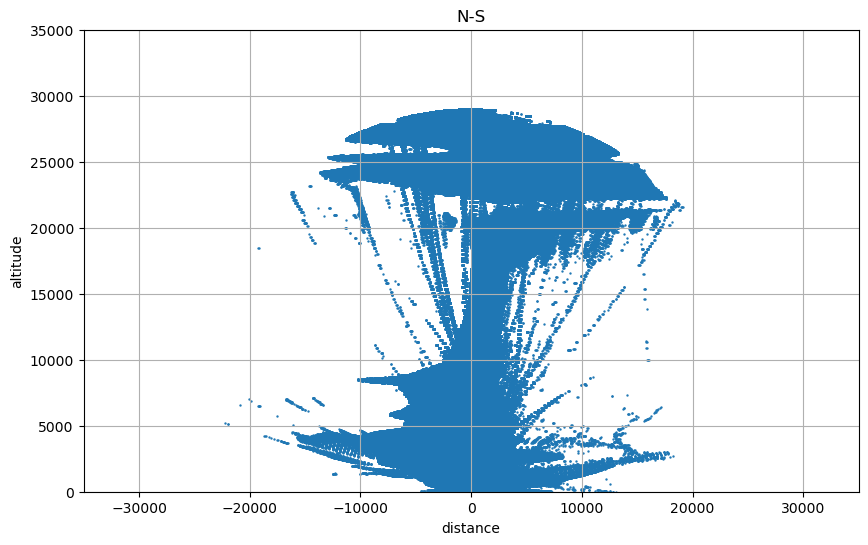

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

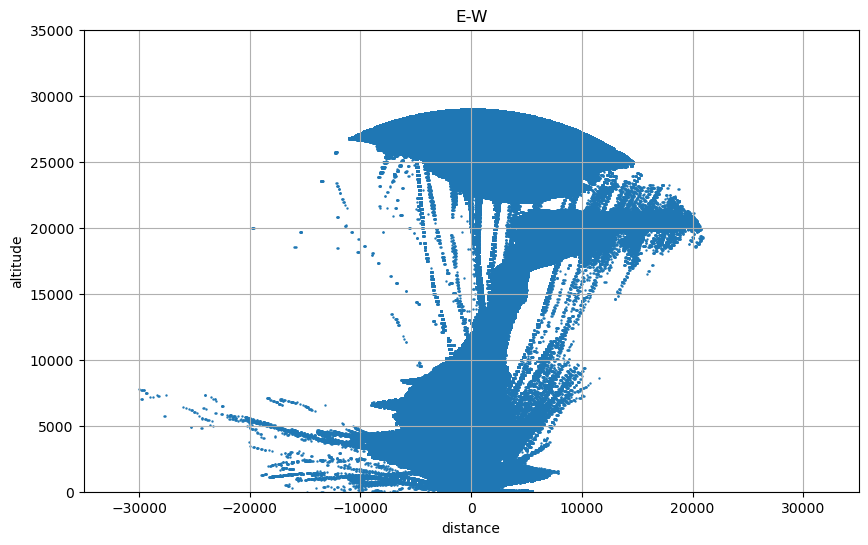

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [ ]:
corner_labels = ['Bottom edge (5)', 'Right edge (6)', 'Top edge (7)', 'Left edge (2)']

<Figure size 1000x600 with 0 Axes>

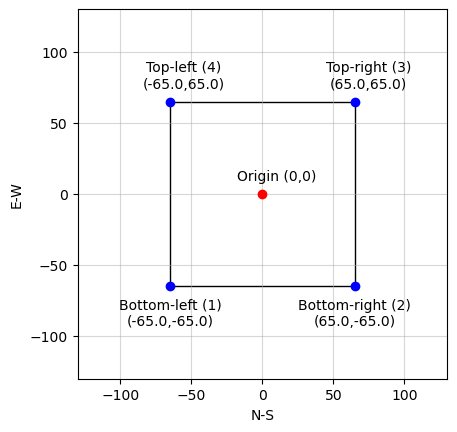

In [7]:
import matplotlib.pyplot as plt

# Length of the square's side
side_length = 130

# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate half the side length
half_length = side_length / 2

# Coordinates of the square's corners
corners = [
    (-half_length, -half_length), # Bottom-left
    (-half_length, half_length),  # Top-left
    (half_length, half_length),   # Top-right
    (half_length, -half_length)   # Bottom-right
]

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the square
square = plt.Polygon(corners, closed=True, fill=None, edgecolor='black')
ax.add_patch(square)

# Plot the origin
ax.plot(0, 0, 'ro')  # Red dot at the origin

# Annotate the origin
ax.annotate('Origin (0,0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center')

# Annotate the corners
corner_labels = ['Bottom-left (1)', 'Top-left (4)', 'Top-right (3)', 'Bottom-right (2)']
corner_offsets = [(0, -28), (10, 10), (10, 10), (0, -28)]
for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
    ax.plot(x, y, 'bo')  # Blue dots at corners
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Set the limits of the plot
ax.set_xlim(-side_length, side_length)
ax.set_ylim(-side_length, side_length)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Comment out grid lines
ax.grid(alpha=0.5)

# Show the plot
plt.xlabel('N-S')
plt.ylabel('E-W')
# plt.title('Acoustic')
plt.show()

<Figure size 1500x1500 with 0 Axes>

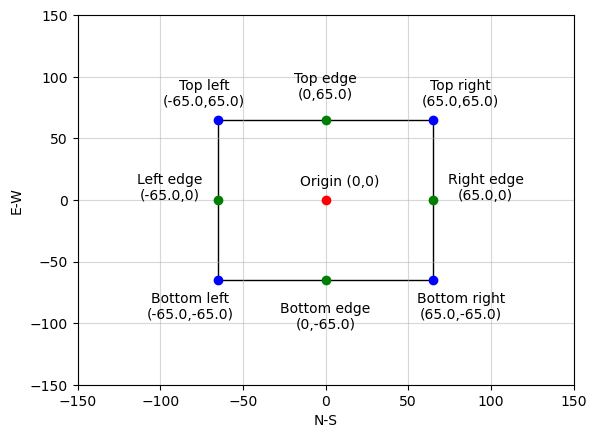

In [21]:
import matplotlib.pyplot as plt

# Length of the square's side
side_length = 130

# Set the figure size
plt.figure(figsize=(15, 15))

# Calculate half the side length
half_length = side_length / 2

# Coordinates of the square's corners
corners = [
    (-half_length, -half_length), # Bottom-left
    (-half_length, half_length),  # Top-left
    (half_length, half_length),   # Top-right
    (half_length, -half_length)   # Bottom-right
]

# Coordinates of the midpoints of the edges
midpoints = [
    (0, -half_length), # Bottom midpoint
    (-half_length, 0), # Left midpoint
    (0, half_length),  # Top midpoint
    (half_length, 0)   # Right midpoint
]

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the square
square = plt.Polygon(corners, closed=True, fill=None, edgecolor='black')
ax.add_patch(square)

# Plot the origin
ax.plot(0, 0, 'ro')  # Red dot at the origin

# Annotate the origin
ax.annotate('Origin (0,0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center')

# Annotate the corners
corner_labels = ['Bottom left', 'Top left', 'Top right', 'Bottom right']
corner_offsets = [(-20, -28), (-10, 10), (20, 10), (20, -28)]
for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
    ax.plot(x, y, 'bo')  # Blue dots at corners
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Annotate the midpoints
midpoint_labels = ['Bottom edge', 'Left edge', 'Top edge', 'Right edge']
midpoint_offsets = [(0, -35), (-35, 0), (0, 15), (38, 0)]
for (x, y), label, offset in zip(midpoints, midpoint_labels, midpoint_offsets):
    ax.plot(x, y, 'go')  # Green dots at midpoints
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Set the limits of the plot
# ax.set_xlim(-side_length, side_length)
# ax.set_ylim(-side_length, side_length)

# Set the aspect of the plot to be equal
# ax.set_aspect('equal')

# Comment out grid lines
ax.grid(alpha=0.5)

plt_lim = 150
plt.xlim((-plt_lim,plt_lim))
plt.ylim((-plt_lim,plt_lim))

# Show the plot
plt.xlabel('N-S')
plt.ylabel('E-W')
# plt.title('Square with Origin at the Center and Midpoints Annotated')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_5 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_5/backscatter_coordinates_5_G250-r2.csv')
df_7 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_7/backscatter_coordinates_7_G250-r2.csv')
df =  pd.concat([df_0,df_5,df_7])

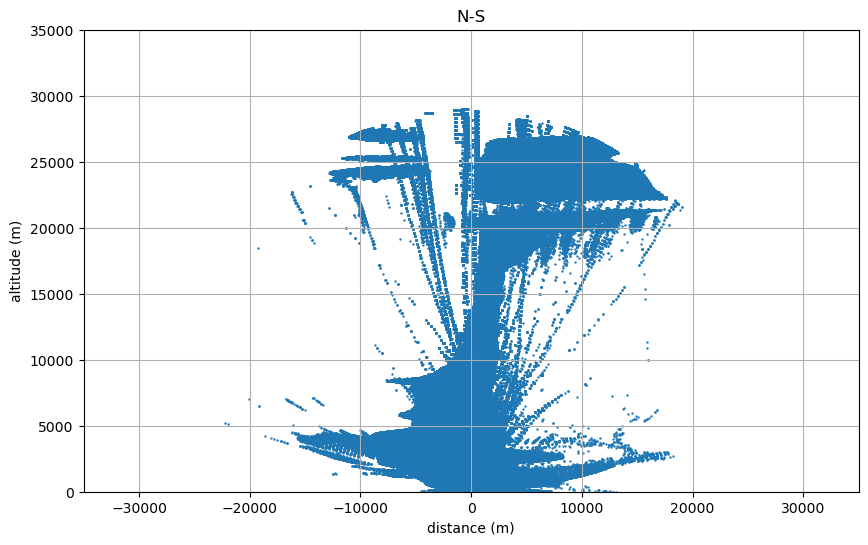

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

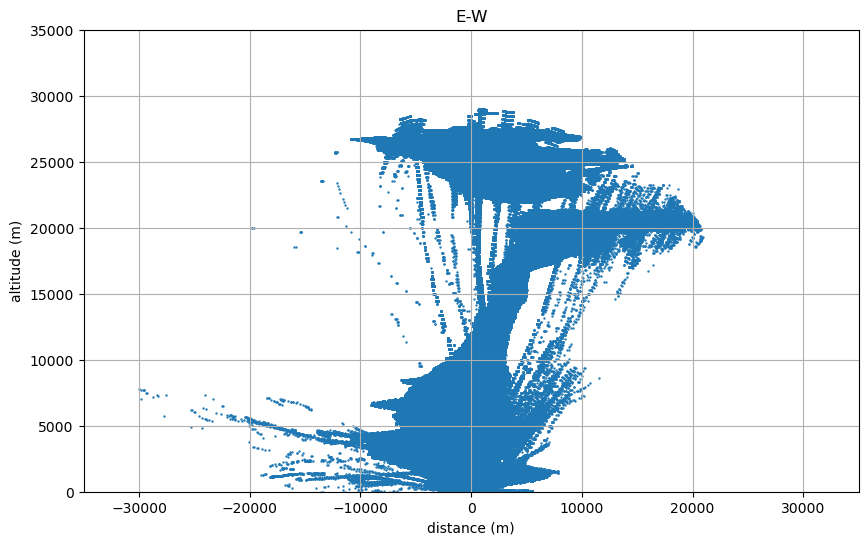

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df_6 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_6/backscatter_coordinates_6_G250-r2.csv')
df_8 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_8/backscatter_coordinates_8_G250-r2.csv')
df =  pd.concat([df_0,df_6,df_8])

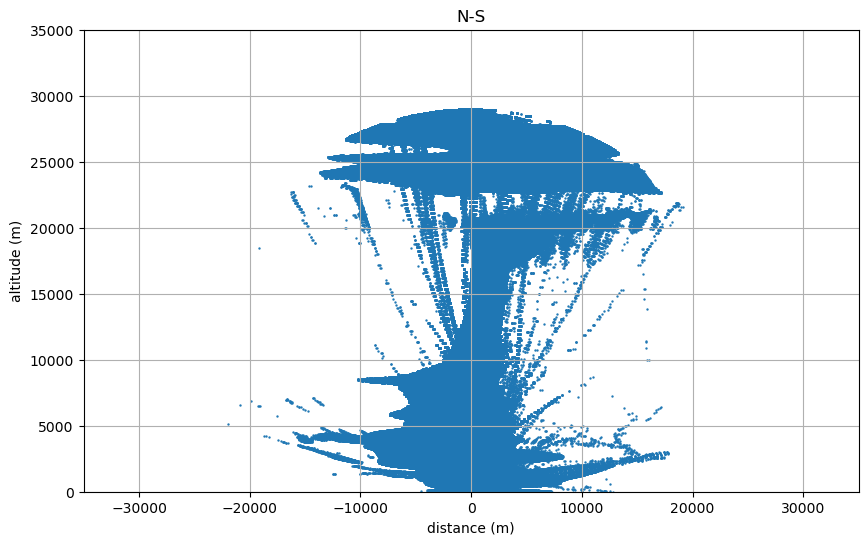

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

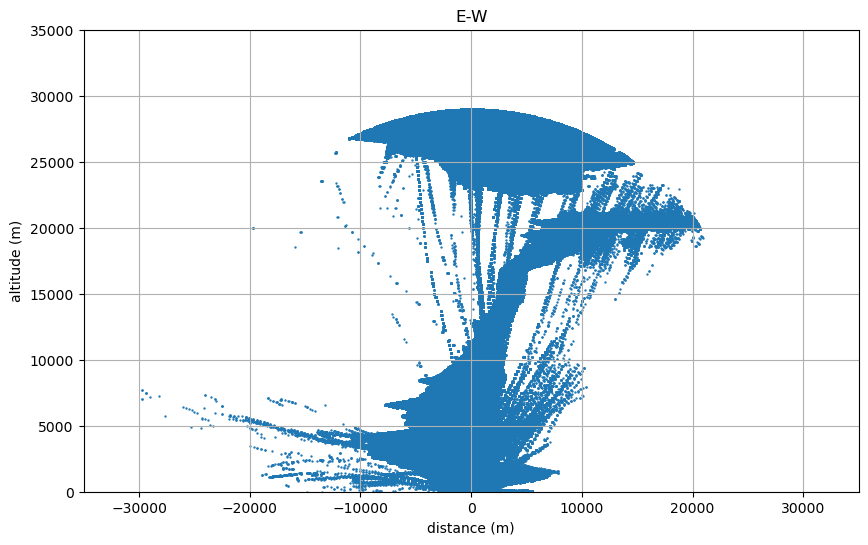

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')

df_1 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_1/backscatter_coordinates_1_G250-r2.csv')
df_2 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_2/backscatter_coordinates_2_G250-r2.csv')
df_3 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_3/backscatter_coordinates_3_G250-r2.csv')
df_4 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_4/backscatter_coordinates_4_G250-r2.csv')

df_5 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_5/backscatter_coordinates_5_G250-r2.csv')
df_6 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_6/backscatter_coordinates_6_G250-r2.csv')
df_7 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_7/backscatter_coordinates_7_G250-r2.csv')
df_8 = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_8/backscatter_coordinates_8_G250-r2.csv')

# df =  pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8])

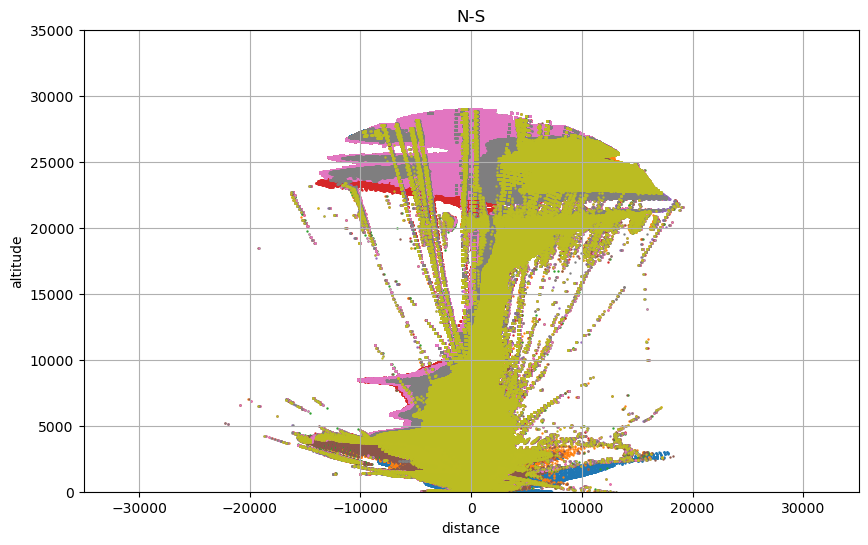

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for x in range(9):
    df = pd.read_csv(f'/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_{x}/backscatter_coordinates_{x}_G250-r2.csv')
    plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

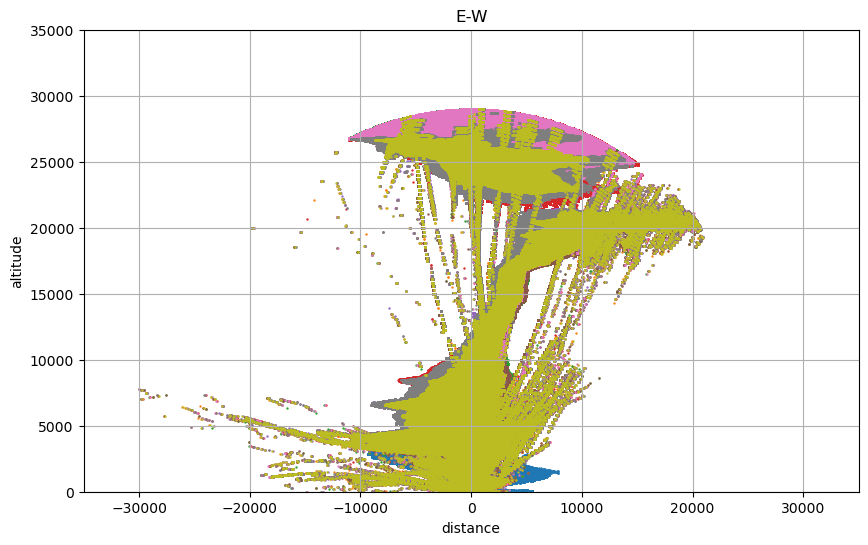

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for x in range(9):
    df = pd.read_csv(f'/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_{x}/backscatter_coordinates_{x}_G250-r2.csv')
    plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

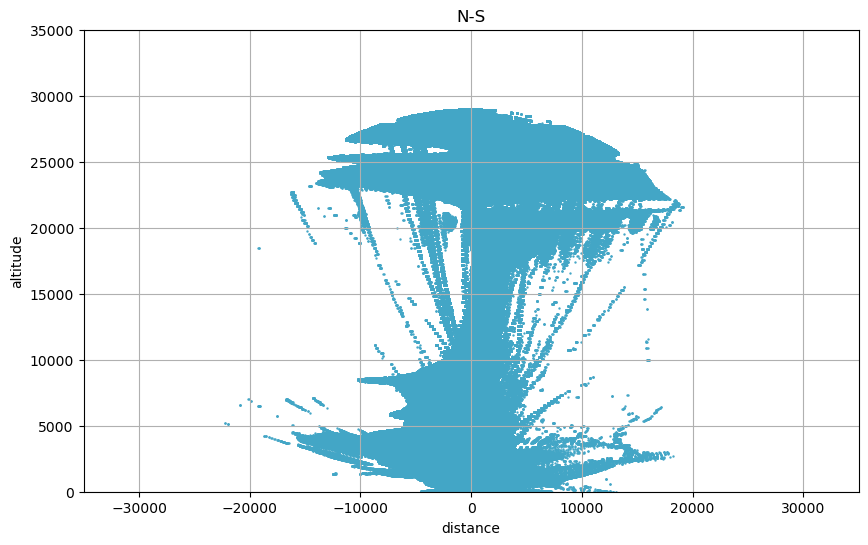

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for x in range(9):
    df = pd.read_csv(f'/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_{x}/backscatter_coordinates_{x}_G250-r2.csv')
    plt.scatter(df['x_val'],df['z_val'], s=0.5, color='#43A6C6')

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

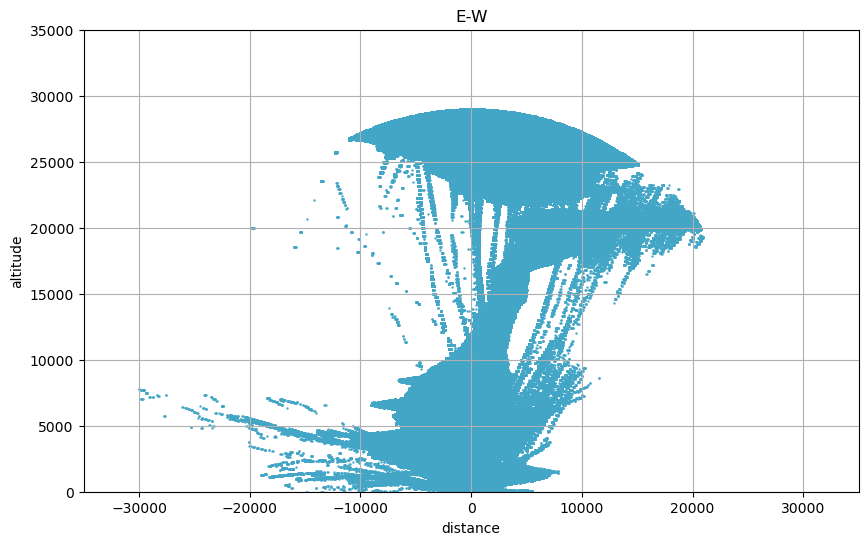

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for x in range(9):
    df = pd.read_csv(f'/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_{x}/backscatter_coordinates_{x}_G250-r2.csv')
    plt.scatter(df['y_val'],df['z_val'], s=0.5, color='#43A6C6')

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

<Figure size 2000x2000 with 0 Axes>

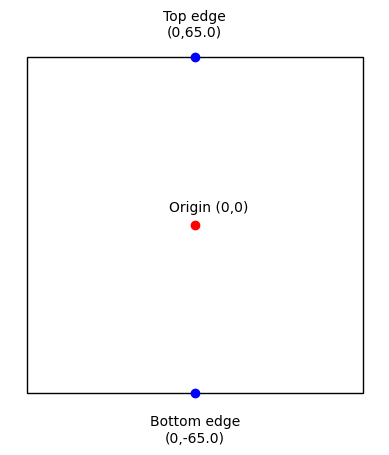

In [36]:
import matplotlib.pyplot as plt

# Length of the square's side
side_length = 130

# Set the figure size
plt.figure(figsize=(20, 20))

# Calculate half the side length
half_length = side_length / 2

# Coordinates of the square's corners
corners = [
    (-half_length, -half_length), # Bottom-left
    (-half_length, half_length),  # Top-left
    (half_length, half_length),   # Top-right
    (half_length, -half_length)   # Bottom-right
]

# Coordinates of the midpoints of the edges
midpoints = [
    (0, -half_length), # Bottom midpoint
    (-half_length, 0), # Left midpoint
    (0, half_length),  # Top midpoint
    (half_length, 0)   # Right midpoint
]

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the square
square = plt.Polygon(corners, closed=True, fill=None, edgecolor='black')
ax.add_patch(square)

ax.plot(0, 0, 'ro')  # Red dot at the origin
ax.annotate('Origin (0,0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center')

# corner_labels = ['', '', 'Top right', '']
# corner_offsets = [(0, 0), (0, 0), (20, 10), (0, 0)]
# for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
    # Blue dots at corners

x , y  =  0, -half_length
ax.plot(x, y, 'bo') 
label = 'Bottom edge'
offset = (0, -35)
ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

x , y  = 0, half_length
ax.plot(x, y, 'bo') 
label = 'Top edge'
offset = (0, 15)
ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')



# # Annotate the corners
# corner_labels = ['Bottom left', 'Top left', 'Top right', 'Bottom right']
# corner_offsets = [(-20, -28), (-10, 10), (20, 10), (20, -28)]
# for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
#     ax.plot(x, y, 'bo')  # Blue dots at corners
#     ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# # Annotate the midpoints
# midpoint_labels = ['Bottom edge', 'Left edge', 'Top edge', 'Right edge']
# midpoint_offsets = [(0, -35), (-35, 0), (0, 15), (38, 0)]
# for (x, y), label, offset in zip(midpoints, midpoint_labels, midpoint_offsets):
#     ax.plot(x, y, 'go')  # Green dots at midpoints
#     ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Enable grid lines
ax.grid(True, alpha=0.5)

# Remove the axis lines and side lines
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine
ax.spines['bottom'].set_visible(False)  # Hide bottom spine
ax.spines['left'].set_visible(False)  # Hide left spine

# Set the limits of the plot
# ax.set_xlim(-side_length, side_length)
# ax.set_ylim(-side_length, side_length)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

plt.show()

<Figure size 1000x1000 with 0 Axes>

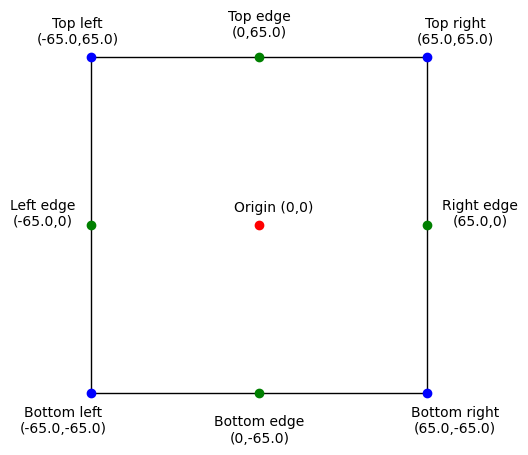

In [4]:
import matplotlib.pyplot as plt

# Length of the square's side
side_length = 130

# Set the figure size
plt.figure(figsize=(10, 10))

# Calculate half the side length
half_length = side_length / 2

# Coordinates of the square's corners
corners = [
    (-half_length, -half_length), # Bottom-left
    (-half_length, half_length),  # Top-left
    (half_length, half_length),   # Top-right
    (half_length, -half_length)   # Bottom-right
]

# Coordinates of the midpoints of the edges
midpoints = [
    (0, -half_length), # Bottom midpoint
    (-half_length, 0), # Left midpoint
    (0, half_length),  # Top midpoint
    (half_length, 0)   # Right midpoint
]

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the square
square = plt.Polygon(corners, closed=True, fill=None, edgecolor='black')
ax.add_patch(square)

# Plot the origin
ax.plot(0, 0, 'ro')  # Red dot at the origin

# Annotate the origin
ax.annotate('Origin (0,0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center')

# Annotate the corners
corner_labels = ['Bottom left', 'Top left', 'Top right', 'Bottom right']
corner_offsets = [(-20, -28), (-10, 10), (20, 10), (20, -28)]
for (x, y), label, offset in zip(corners, corner_labels, corner_offsets):
    ax.plot(x, y, 'bo')  # Blue dots at corners
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Annotate the midpoints
midpoint_labels = ['Bottom edge', 'Left edge', 'Top edge', 'Right edge']
midpoint_offsets = [(0, -35), (-35, 0), (0, 15), (38, 0)]
for (x, y), label, offset in zip(midpoints, midpoint_labels, midpoint_offsets):
    ax.plot(x, y, 'go')  # Green dots at midpoints
    ax.annotate(f'{label}\n({x},{y})', (x, y), textcoords="offset points", xytext=offset, ha='center')

# Enable grid lines
ax.grid(True, alpha=0.5)

# Remove the axis lines and side lines
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine
ax.spines['bottom'].set_visible(False)  # Hide bottom spine
ax.spines['left'].set_visible(False)  # Hide left spine

# Set the limits of the plot
# ax.set_xlim(-side_length, side_length)
# ax.set_ylim(-side_length, side_length)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

plt.show()
